<a href="https://colab.research.google.com/github/SmileCat42/Deep-Learning/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab11**
กฤตยา ตันติชัยยกุล

In [2]:
import kagglehub

# Download latest version

path = kagglehub.dataset_download("karakaggle/kaggle-cat-vs-dog-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'kaggle-cat-vs-dog-dataset' dataset.
Path to dataset files: /kaggle/input/kaggle-cat-vs-dog-dataset


เป็นการเก็บ path ที่อยู่ของไฟล์รูปภาพที่ดาวน์โหลดมาผ่านเว็ป

In [3]:
import os, shutil

original_dataset_dir = os.path.join(path, "kagglecatsanddogs_3367a", "PetImages")

#Cats data set

cat_src_dir = os.path.join(original_dataset_dir, 'Cat')

dog_src_dir = os.path.join(original_dataset_dir, 'Dog')

print(os.path.exists(cat_src_dir)) # check true or not

print(os.path.exists(dog_src_dir)) # check true or not

True
True


เป็นการแบ่งตัวแปรเป็น 2 ฝั่ง คือฝั่งแมวกับฝั่งหมา โดยที่ dog_src_dir เข้าถึงพาทของรูปหมา ส่วนcat_src_dir เข้าถึงพาทของรูปแมว

In [6]:
# Directory where you'll store your smaller dataset

base_dir = "/content/cats_and_dogs_small"

if os.path.exists(base_dir): # clear folder
  shutil.rmtree(base_dir)

os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')

os.makedirs(train_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')

os.makedirs(test_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(validation_dir, exist_ok=True)
train_cats_dir = os.path.join(train_dir, 'cats')

os.makedirs(train_cats_dir, exist_ok=True)

train_dogs_dir = os.path.join(train_dir, 'dogs')

os.makedirs(train_dogs_dir, exist_ok=True)

validation_cats_dir = os.path.join(validation_dir, 'cats')

os.makedirs(validation_cats_dir, exist_ok=True)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

os.makedirs(validation_dogs_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, 'cats')

os.makedirs(test_cats_dir, exist_ok=True)

test_dogs_dir = os.path.join(test_dir, 'dogs')

os.makedirs(test_dogs_dir, exist_ok=True)

cat_files = [f for f in os.listdir(cat_src_dir)]

dog_files = [f for f in os.listdir(dog_src_dir)]

เป็นการสร้างโฟลเดอร์ train test รอไว้สำหรับการรอคัดลอกรูปภาพมาใส่


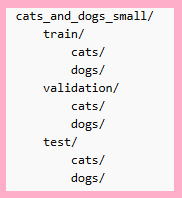

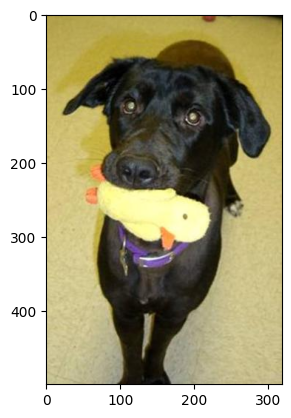

Image size (width, height): (319, 500)
Image shape (height, width, channels): (500, 319, 3)


In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

img_path = os.path.join(dog_src_dir, dog_files[500])

img = Image.open(img_path)

plt.imshow(img)
plt.show()

print("Image size (width, height):", img.size)
print("Image shape (height, width, channels):", np.array(img).shape)

dog_src_dir = โฟลเดอร์ที่เก็บรูปหมา
dog_files[500] = ชื่อไฟล์ลำดับที่ 500
os.path.join() = ต่อ path ให้ถูกต้อง

แล้วจึงนำมา ap.array เพื่อทำให้เป็นตัวเลข เนื่องจาก CNN จะทำงานกับตัวเลข

In [9]:
train_cats = cat_files[:1000]
train_dogs = dog_files[:1000]

val_cats = cat_files[1000:1500]
val_dogs = dog_files[1000:1500]

test_cats = cat_files[1500:2000]
test_dogs = dog_files[1500:2000]

เป็นการแบ่งโครง ยังไม่ได้แตะต้องไฟล์จริง

In [10]:
def copy_files(file_list, src_dir, dst_dir):
  for fname in file_list:
    src = os.path.join(src_dir, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)

วางคำสั่ง copy เตรียม!!

In [11]:
copy_files(train_cats, cat_src_dir, os.path.join(base_dir, "train", "cats"))
copy_files(val_cats, cat_src_dir, os.path.join(base_dir, "validation", "cats"))
copy_files(test_cats, cat_src_dir, os.path.join(base_dir, "test", "cats"))
copy_files(train_dogs, dog_src_dir, os.path.join(base_dir, "train", "dogs"))
copy_files(val_dogs, dog_src_dir, os.path.join(base_dir, "validation", "dogs"))
copy_files(test_dogs, dog_src_dir, os.path.join(base_dir, "test", "dogs"))

print("Dataset ready at:", base_dir)
print(len(train_cats), len(val_cats), len(test_cats))
print(len(train_dogs), len(val_dogs), len(test_dogs))

Dataset ready at: /content/cats_and_dogs_small
1000 500 500
1000 500 500


เอา list รายชื่อไฟล์ train_cats

ไปหาไฟล์จริงใน cat_src_dir

copy ไปไว้ที่ base_dir/train/cats

In [12]:
for name in ["train", "validation", "test"]:
  print(os.path.join(base_dir, name, "cats"))
  print(len(os.listdir(os.path.join(base_dir, name, "cats"))))
  print(os.path.join(base_dir, name, "dogs"))
  print(len(os.listdir(os.path.join(base_dir, name, "dogs"))))

/content/cats_and_dogs_small/train/cats
1000
/content/cats_and_dogs_small/train/dogs
1000
/content/cats_and_dogs_small/validation/cats
500
/content/cats_and_dogs_small/validation/dogs
500
/content/cats_and_dogs_small/test/cats
500
/content/cats_and_dogs_small/test/dogs
500


เช็คว่าข้อมูลเท่ากัน

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

ขยายความสามารถให้ Conv2D ขึ้นทุกๆชั้น ในขณะที่ Maxpooling ทำการย่อรูปให้เล็กลงเรื่อยๆ เพื่อป้องกันการเข้าสู่การ Flatten จะทำให้เกิดพารามิเตอร์มหาศาล ขนาดย่อให้เหลือ 7*7 8*8 ยัง3-4 ล้านตัวเลย

In [20]:
from tensorflow.keras import optimizers

model.compile(
loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['accuracy']
)

(learning_rate=1e-4) คือขนาดก้าว หรือ 0.0001 ซึ่งถ้าเยอะไปกระโดดแรง loss แกว่ง แต่ถ้าน้อยไปก็เรียนช้า ซึ่ง 0.0001 ถือว่ากำลังดี (เหรอ?555)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # ตั้งค่าไว้ก่อน ยังไม่หารจริง
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


แปลงไฟล์ภาพดิบให้เป็นตัวเลข ที่โมเดลเข้าใจได้ ทำให้ทุกรูปเท่ากัน 150*150 rescale=1./255 ซึ่งต่างจากการ Flatten คือ โค้ดนี้จะแปลงรูปก่อนส่งเข้าไปหาโมเดล ขนาดเท่าเดิมเลย แค่ทำให้ค่าข้อมูลเป็นเลข ในขณะที่ Flatten อยู่ข้างในแล้ว จะทำการแปลงเป็น 1 มิติ เพื่อส่งต่อให้ Dense

In [25]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


เป็นการเช็คขนาดข้อมูลว่าถูกต้องก่อน fit หรือไม่

In [27]:
history = model.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7191 - loss: 0.5368 - val_accuracy: 0.6970 - val_loss: 0.5691
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7450 - loss: 0.5162 - val_accuracy: 0.6880 - val_loss: 0.5800
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7733 - loss: 0.4841 - val_accuracy: 0.6740 - val_loss: 0.6150
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7804 - loss: 0.4690 - val_accuracy: 0.7070 - val_loss: 0.5440
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7933 - loss: 0.4448 - val_accuracy: 0.7140 - val_loss: 0.5430
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.8061 - loss: 0.4188 - val_accuracy: 0.7050 - val_loss: 0.5594
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8262 - loss: 0.3906 - val_accuracy: 0.7180 - val_loss: 0.5319
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.8154 - loss: 0.3781 - val_accu

In [28]:
model.save('cats_and_dogs_small_1.h5')

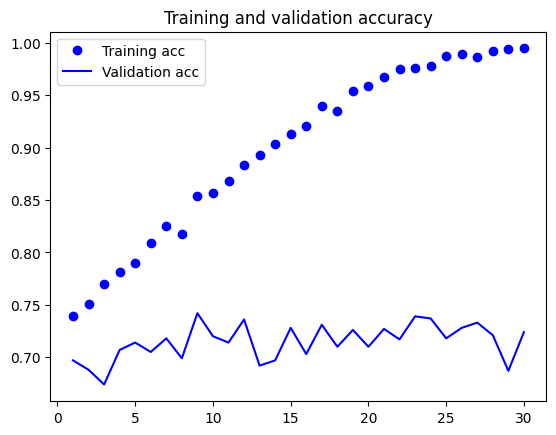

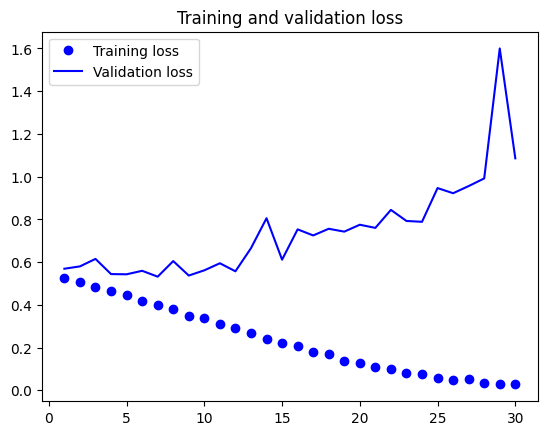

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

#

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()